# ch01.08 이미지넷 모델구현 - AlexNet
---

* 날짜:
* 이름:

## 학습내용
    - AlexNet 모델 특징에 대해 이해한다.
    - AlexNet 모델을 텐서플로우를 이용해 구현한다. 


## 소개
---
* 데이터셋 : f-minst(fashoin mnist)
* 데이터를 소개하세요.
* 데이터의 형태를 파악하세요
* 적절한 모델을 생성하세요
* 데이터에 적합하게 학습을 진행하세요.

## 구현
---

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


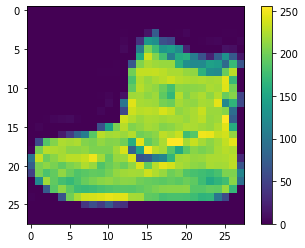

In [ ]:
 for i in range(15):
   plt.subplot(3,5,1+i)
   plt.imshow(x_train[i])
   plt.colorbar()
   plt.show()

In [ ]:
# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0
# 전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [ ]:
from tensorflow.keras import layers, models, utils

def build_AlexNet():
  x = layers.Input(shape=(28,28,1))

  # 첫번째 컨볼루션 레이어
  y = layers.Conv2D(filters=96, kernel_size=11, strides=4, padding='same', activation='relu')(x)
  y = layers.MaxPool2D(pool_size=3, strides=2)(y)
  y = layers.BatchNormalization()(y)
  
  
  # 두번째 컨볼루션 레이어
  y = layers.Conv2D(filters=256, kernel_size=5, strides=1, padding='same', activation='relu')(x)
  y = layers.MaxPool2D(pool_size=2, strides=2)(y)
  y = layers.BatchNormalization()(y)
  

  # 3,4,5 번째 컨볼루션 레이어
  y = layers.Conv2D(filters=384, kernel_size=3, strides=1, padding='same', activation='relu')(x)
  y = layers.Conv2D(filters=384, kernel_size=3, strides=1, padding='same', activation='relu')(x)
  y = layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')(x)
  y = layers.MaxPool2D(pool_size=3, strides=2)(y)
  y = layers.BatchNormalization()(y)


  # 6번째 fully-connected 레이어
  y=layers.Flatten()(y)
  y=layers.Dense(4096, activation='relu')(y)
  y=layers.Dropout(0.5)(y)
  y=layers.Dense(4096, activation='relu')(y)
  y=layers.Dropout(0.5)(y)
  y=layers.Dense(1000, activation='softmax')(y)
  model = models.Model(x,y)
  return model

In [ ]:
model = build_AlexNet()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 256)       2560      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 13, 13, 256)      1024      
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 43264)             0         
                                                                 
 dense (Dense)               (None, 4096)              177213

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
print('===============================================테스트 스코어===============================================')
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 96s 45ms/step - loss: 0.6721 - accuracy: 0.8432
Epoch 2/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.3570 - accuracy: 0.8746
Epoch 3/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.3544 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.3499 - accuracy: 0.8812
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.3546 - accuracy: 0.8835
Epoch 6/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.3546 - accuracy: 0.8832
Epoch 7/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.3650 - accuracy: 0.8852
Epoch 8/10
 669/1875 [=========>....................] - ETA: 55s - loss: 0.3458 - accuracy: 0.8869

KeyboardInterrupt: ignored